# Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Load 2014 data

In [2]:
df = pd.read_csv('../input/loan_2014_prp.csv', low_memory=False)
df.tail()

,inqlast12m,disbursementmethod,dti,secappopenactil,numactvrevtl,verificationstatusjoint,grade,emplength,totalrevhilim,mosinoldrevtlop,...,openactil,delinq2yrs,totcollamt,intrate,revolbaljoint,numiltl,annualinc,openil12m,issued,loanstatus
235626,NaN,Cash,5.39,NaN,3.0,NaN,A,3 years,53100.0,130.0,...,NaN,3.0,0.0,7.90%,NaN,9.0,83000.0,NaN,Jan-2014,Fully Paid
235627,NaN,Cash,25.65,NaN,2.0,NaN,D,7 years,13100.0,93.0,...,NaN,0.0,0.0,16.99%,NaN,38.0,46000.0,NaN,Jan-2014,Current
235628,NaN,Cash,22.78,NaN,2.0,NaN,D,10+ years,16000.0,166.0,...,NaN,1.0,0.0,19.20%,NaN,3.0,46000.0,NaN,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The last two raws are invalid.

In [3]:
cols = df.columns.values

In [4]:
df = df[:-2]

#### There are 105 features in total. But 30 of them are all Nulls, and the other 30 of them have Nulls. There are 56 numeric features and 19 categorical features.  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235629 entries, 0 to 235628
Columns: 105 entries, inqlast12m to loanstatus
dtypes: float64(85), object(20)
memory usage: 188.8+ MB


In [6]:
all_null_feature=[]
have_null_feature=[]
num_feature=[]
ob_feature=[]

for col in cols:
    if df[col].isnull().sum() == df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].isnull().sum() > 0:
            have_null_feature.append(col)
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)
            
print('# of numerical features:', len(num_feature))
print('# of categorical features:',len(ob_feature))
print('# of all-NULL features:',len(all_null_feature))
print('# of have-NULL features:',len(all_null_feature))
print('Categorical features are:')
print(ob_feature)
print('All-NULL features are:')
print(all_null_feature)
print('Have-NULL features are:')
print(have_null_feature)

# of numerical features: 56
# of categorical features: 19
# of all-NULL features: 30
# of have-NULL features: 30
Categorical features are:
['disbursementmethod', 'grade', 'emplength', 'homeownership', 'addrstate', 'revolutil', 'earliestcrline', 'subgrade', 'emptitle', 'applicationtype', 'purpose', 'zipcode', 'desc', 'verificationstatus', 'initialliststatus', 'term', 'intrate', 'issued', 'loanstatus']
All-NULL features are:
['inqlast12m', 'secappopenactil', 'verificationstatusjoint', 'allutil', 'openil24m', 'secappchargeoffwithin12mths', 'maxbalbc', 'secappinqlast6mths', 'secappearliestcrline', 'annualincjoint', 'secappmthssincelastmajorderog', 'id', 'openrv12m', 'dtijoint', 'openrv24m', 'secappmortacc', 'memberid', 'openacc6m', 'ilutil', 'secappopenacc', 'totalcutl', 'mthssincercntil', 'totalbalil', 'secapprevolutil', 'secappcollections12mthsexmed', 'inqfi', 'secappnumrevaccts', 'openactil', 'revolbaljoint', 'openil12m']
Have-NULL features are:
['avgcurbal', 'mthssincelastrecord', 'mos

## 2. Categorical feature exploration

### (1) Categorical features 

In [7]:
i = 0
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

disbursementmethod
# of null values: 0
Vaule counts:
Cash    235629
Name: disbursementmethod, dtype: int64


It indicates the loan disbursement method. Valid values are "DIRECT_PAY" or "CASH"

In [8]:
i = 1
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

grade
# of null values: 0
Vaule counts:
C    66565
B    61935
D    42992
A    36108
E    20121
F     6223
G     1685
Name: grade, dtype: int64


Lending Club assigned loan grade.

In [9]:
i = 2
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

emplength
# of null values: 0
Vaule counts:
10+ years    79505
2 years      20487
3 years      18267
< 1 year     17982
1 year       14593
4 years      13528
7 years      13099
5 years      13051
n/a          12019
8 years      11853
6 years      11821
9 years       9424
Name: emplength, dtype: int64


Employment length in months. Possible values are whole numbers from 0 and higher. Null indicates not employed.

In [10]:
i = 3
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

homeownership
# of null values: 0
Vaule counts:
MORTGAGE    119937
RENT         92684
OWN          23007
ANY              1
Name: homeownership, dtype: int64


The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

In [11]:
i = 4
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

addrstate
# of null values: 0
Vaule counts:
CA    33288
NY    19923
TX    18967
FL    15691
IL     9628
NJ     8863
PA     8427
OH     8011
GA     7600
VA     6965
NC     6442
MI     6205
MD     5564
AZ     5507
MA     5232
WA     5118
CO     4929
MN     4276
IN     4206
TN     3907
MO     3788
CT     3483
NV     3225
WI     3101
AL     3034
SC     2971
OR     2912
LA     2761
KY     2379
OK     2118
KS     2103
AR     1806
UT     1669
NM     1367
WV     1311
MS     1197
HI     1196
NH     1155
RI     1043
MT      731
DE      661
DC      637
AK      598
WY      583
VT      542
SD      506
ID        1
IA        1
ME        1
Name: addrstate, dtype: int64


The address state provided by the borrower during loan application

In [12]:
i = 5
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

revolutil
# of null values: 125
Vaule counts:
0%        590
59%       520
58%       515
53%       512
48%       485
50%       483
55%       479
54%       472
57%       472
46%       471
52%       467
62%       466
61%       466
47%       462
51%       457
60%       451
67%       450
65%       442
49%       441
63%       441
64%       438
40%       436
66%       429
68%       428
43%       428
56%       428
44%       423
69%       422
41%       421
45%       416
         ... 
141.8%      1
111%        1
105%        1
108%        1
112%        1
180.3%      1
129.5%      1
104%        1
114.9%      1
114.5%      1
125.6%      1
122.2%      1
127%        1
117.5%      1
177.7%      1
366.6%      1
129.4%      1
113.7%      1
134.5%      1
119.7%      1
112.2%      1
146.1%      1
125.3%      1
107.4%      1
116.8%      1
105.4%      1
113.1%      1
119.1%      1
109.2%      1
107.8%      1
Name: revolutil, Length: 1160, dtype: int64


Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [13]:
i = 6
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

earliestcrline
# of null values: 0
Vaule counts:
Aug-2001    1980
Aug-2000    1945
Sep-2000    1719
Aug-2002    1711
Aug-1999    1696
Oct-2000    1658
Sep-1999    1642
Sep-2002    1574
Oct-2001    1574
Sep-2001    1562
Oct-1999    1543
Nov-1999    1525
Sep-1998    1505
Oct-2002    1472
Nov-2000    1468
Mar-2001    1452
Nov-2001    1440
Jul-2001    1421
Sep-2003    1415
Mar-2000    1399
Aug-2003    1389
May-2001    1384
Oct-1998    1371
Jul-2002    1370
Jun-2000    1366
Jun-2001    1356
Jul-2000    1351
Apr-2001    1347
Oct-2003    1327
Aug-1998    1312
            ... 
Dec-1956       1
Oct-1958       1
Jul-1961       1
Jan-1954       1
May-1963       1
May-1958       1
Dec-1960       1
Sep-1963       1
Oct-1950       1
Jul-1958       1
Feb-1963       1
Jan-1948       1
Mar-1961       1
Apr-1962       1
Aug-1958       1
Aug-1960       1
Dec-1963       1
Oct-1962       1
Jan-1953       1
Aug-1962       1
Nov-1954       1
Aug-1961       1
Mar-1960       1
Nov-1956       1
Mar-1962       1

The date the borrower's earliest reported credit line was opened

In [14]:
i = 7
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

subgrade
# of null values: 0
Vaule counts:
C2    13965
C3    13794
C1    13498
B4    13475
B5    13309
C4    13093
B3    13075
C5    12215
B2    11439
D1    10880
A5    10761
B1    10637
D2     9544
A4     9124
D3     8487
D4     7881
D5     6200
A3     5842
E1     5589
A2     5234
A1     5147
E2     4831
E3     3902
E4     3101
E5     2698
F1     1935
F2     1355
F3     1321
F4      964
F5      648
G1      527
G2      427
G3      305
G4      214
G5      212
Name: subgrade, dtype: int64


Lending Club assigned loan subgrade.

In [15]:
i = 8
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

emptitle
# of null values: 13236
Vaule counts:
Teacher                                     4569
Manager                                     3772
Registered Nurse                            1960
RN                                          1816
Supervisor                                  1663
Owner                                       1512
Sales                                       1406
Project Manager                             1368
Office Manager                              1185
manager                                     1115
Driver                                      1111
General Manager                             1055
teacher                                     1028
Director                                    1000
Engineer                                     870
President                                    852
owner                                        850
Vice President                               827
driver                                       822
Attorney              

Employment title.

In [16]:
i = 9
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

applicationtype
# of null values: 0
Vaule counts:
Individual    235629
Name: applicationtype, dtype: int64


A unique Lending Club assigned ID for the loan listing.

In [17]:
i = 10
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

purpose
# of null values: 0
Vaule counts:
debt_consolidation    143006
credit_card            55522
home_improvement       13045
other                  10371
major_purchase          3858
medical                 2331
small_business          2277
car                     1832
moving                  1328
vacation                1178
house                    750
renewable_energy         123
wedding                    8
Name: purpose, dtype: int64


A category provided by the borrower for the loan request. Values are: debt_consolidation, medical, home_improvement, renewable_energy, small_business, wedding, vacation, moving, house, car, major_purchase, credit_card, other.

In [18]:
i = 11
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

zipcode
# of null values: 0
Vaule counts:
750xx    2546
945xx    2418
112xx    2382
606xx    2273
300xx    2085
070xx    1936
331xx    1929
100xx    1912
770xx    1795
900xx    1787
117xx    1700
917xx    1685
104xx    1654
891xx    1635
330xx    1606
852xx    1528
921xx    1427
913xx    1391
926xx    1355
925xx    1315
604xx    1272
080xx    1267
600xx    1250
601xx    1242
481xx    1235
334xx    1230
113xx    1218
853xx    1135
956xx    1114
920xx    1106
         ... 
513xx       1
836xx       1
524xx       1
929xx       1
353xx       1
854xx       1
833xx       1
523xx       1
832xx       1
888xx       1
587xx       1
821xx       1
901xx       1
909xx       1
680xx       1
861xx       1
516xx       1
510xx       1
685xx       1
582xx       1
093xx       1
500xx       1
008xx       1
663xx       1
429xx       1
889xx       1
938xx       1
682xx       1
527xx       1
511xx       1
Name: zipcode, Length: 866, dtype: int64


The first 3 numbers of the ZIP code provided by the borrower in the loan application.

In [19]:
i = 12
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

desc
# of null values: 220350
Vaule counts:
  Borrower added on 03/17/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                 11
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                 10
  Borrower added on 02/19/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                  9
  Borrower added 

Loan description provided by the borrower.

In [20]:
i = 13
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

verificationstatus
# of null values: 0
Vaule counts:
Source Verified    97741
Not Verified       70659
Verified           67229
Name: verificationstatus, dtype: int64


Indicates if income is verified by Lending Club.

In [21]:
i = 14
cfe = ob_feature[i]
print(cfe)
print(df[cfe].isnull().sum())
df[cfe].value_counts()

initialliststatus
0


w    123473
f    112156
Name: initialliststatus, dtype: int64

The initial listing status of the loan. Possible values are W, F.

In [22]:
i = 15
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

term
# of null values: 0
Vaule counts:
 36 months    162570
 60 months     73059
Name: term, dtype: int64


The Number of payments on the loan. Values are in months and can be either 36 or 60.

In [23]:
i = 16
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

intrate
# of null values: 0
Vaule counts:
 12.99%    12630
 10.99%    10684
 15.61%    10310
 12.49%     9704
 13.98%     8856
 14.99%     8102
 17.57%     7687
 13.35%     7620
 11.67%     7255
 14.49%     7244
 11.99%     6199
 10.15%     6116
 16.99%     5946
  9.17%     5655
  8.39%     5575
 16.29%     5415
  6.03%     5146
  7.69%     4962
  6.49%     4026
 18.24%     3597
  9.67%     3455
  8.90%     3384
 18.99%     3214
  7.12%     3055
 14.64%     3029
 14.16%     2952
 19.52%     2926
  7.90%     2885
 15.31%     2838
 13.65%     2753
           ...  
 20.49%      983
 17.14%      974
 16.49%      968
 24.99%      963
 21.99%      916
 21.18%      858
  6.99%      855
 17.86%      766
 18.54%      720
 19.22%      663
 25.57%      647
 19.24%      588
 22.45%      558
 25.80%      526
 19.97%      517
 20.50%      470
 25.83%      426
 21.48%      332
 25.89%      305
 22.40%      276
 22.99%      241
 25.99%      214
 23.40%      214
 26.06%      212
 22.90%      212
 23.99

Interest Rate on the loan.

In [24]:
i = 17
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

issued
# of null values: 0
Vaule counts:
Oct-2014    38783
Jul-2014    29306
Nov-2014    25054
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Sep-2014    10606
Dec-2014    10307
Name: issued, dtype: int64


Loan issue dates.

In [25]:
i = 18
cfe = ob_feature[i]
print(cfe)
print('# of null values:', df[cfe].isnull().sum())
print('Vaule counts:')
print(df[cfe].value_counts())

loanstatus
# of null values: 0
Vaule counts:
Fully Paid            169973
Charged Off            38170
Current                25413
Late (31-120 days)      1253
In Grace Period          549
Late (16-30 days)        266
Default                    5
Name: loanstatus, dtype: int64


### (2) Mean responses

The loan status used for risk analysis are Fully Paid and Charge off. Use barplot to understand the mean response of some categorical features w.r.t Loan Status.

In [26]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off'")
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [27]:
dummy_list = ["emplength", "verificationstatus", "delinq2yrs", "addrstate", 'homeownership', 
              "grade", "subgrade", "openacc"]
n = len(dummy_list)

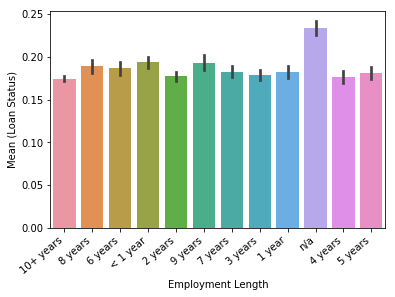

In [28]:
barplot = sns.barplot(x=dummy_list[0], y='loanstatus', data=df)
barplot.set(xlabel='Employment Length', ylabel = 'Mean (Loan Status)')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

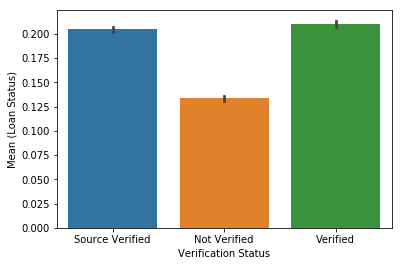

In [29]:
barplot = sns.barplot(x=dummy_list[1], y='loanstatus', data=df)
barplot.set(xlabel='Verification Status', ylabel = 'Mean (Loan Status)')
plt.show()

The verified income gives higher mean value of Loan status. This is consistence with the intuition that brrowers with verified source of income tend to pay their debts.

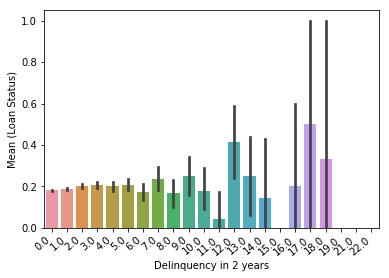

In [30]:
barplot = sns.barplot(x=dummy_list[2], y='loanstatus', data=df)
barplot.set(xlabel='Delinquency in 2 years', ylabel = 'Mean (Loan Status)')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

The Number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. From the bar plot, small value doesn't relate to better fully pay rate as expected.

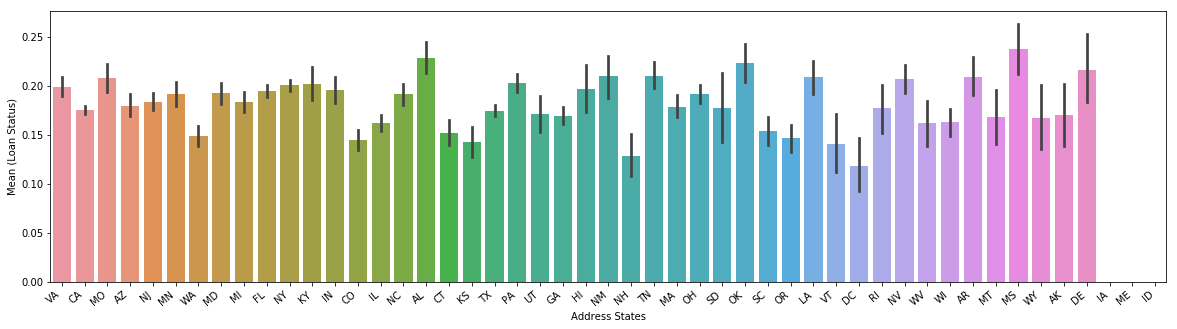

In [31]:
plt.figure(figsize=(20,5))
barplot = sns.barplot(x=dummy_list[3], y='loanstatus', data=df)
barplot.set(xlabel='Address States', ylabel = 'Mean (Loan Status)')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

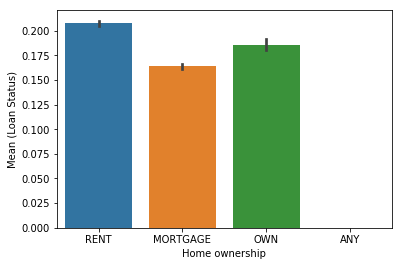

In [32]:
barplot = sns.barplot(x=dummy_list[4], y='loanstatus', data=df)
barplot.set(xlabel='Home ownership', ylabel = 'Mean (Loan Status)')
plt.show()

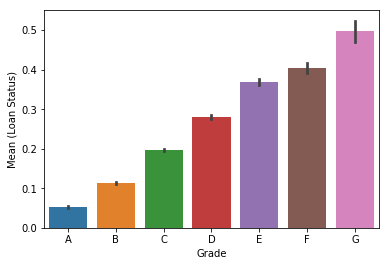

In [33]:
barplot = sns.barplot(x=dummy_list[5], y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
barplot.set(xlabel='Grade', ylabel = 'Mean (Loan Status)')
plt.show()

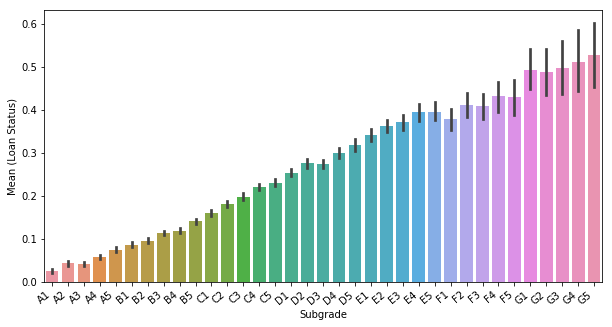

In [34]:
plt.figure(figsize=(10,5))
barplot = sns.barplot(x=dummy_list[6], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))
barplot.set(xlabel='Subgrade', ylabel = 'Mean (Loan Status)')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

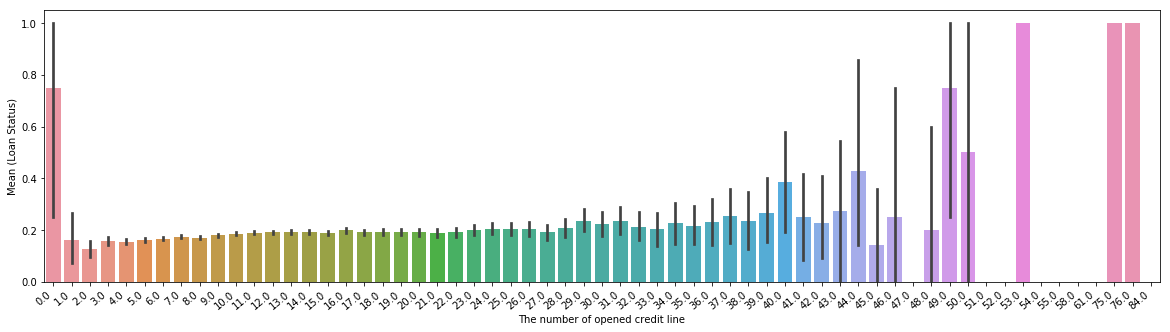

In [35]:
plt.figure(figsize=(20,5))
barplot = sns.barplot(x=dummy_list[7], y='loanstatus', data=df)
barplot.set(xlabel='The number of opened credit line', ylabel = 'Mean (Loan Status)')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

## 3. Numeric feature exploration

### (1) Histogram of installment

For an issued/history loan, fundedamnt is the same as loanamnt, so fundedamnt can be droped.

In [36]:
df.amnt_ratio = df.fundedamnt/df.loanamnt.astype(float,3)
all(x==1 for x in df.amnt_ratio)

True

The installment shows the monthly payment owed by the borrower after the loan originates. The distribution of installment can be shown by a histogram.  

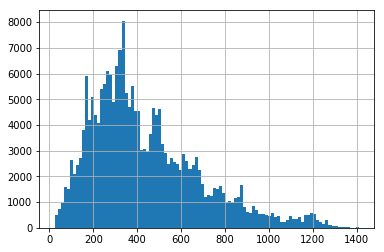

In [37]:
df.installment.hist(bins=100)

### (2) Loan perfomance with respect to quantiled numerical features

In [38]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    normedtable.iloc[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 14)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name, fontsize = 20 )
    fig.savefig('age.jpg')

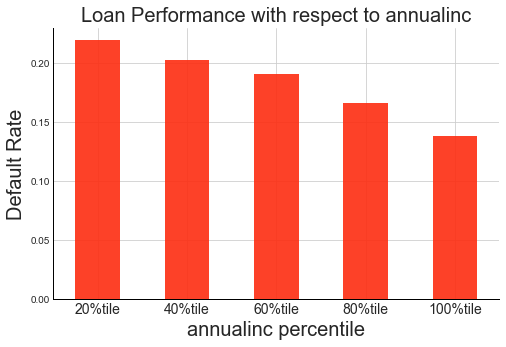

In [39]:
countinuous_variable_plot('annualinc')

annualinc: The annual income provided by the borrower during registration.

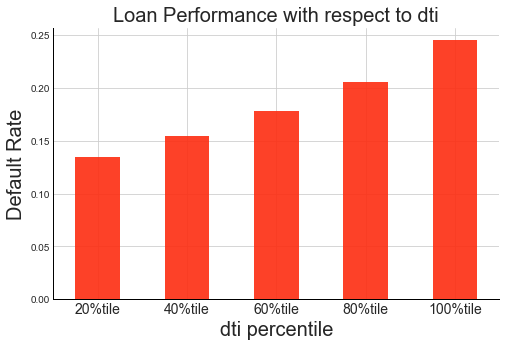

In [40]:
countinuous_variable_plot('dti')

dti: The borrower's debt to income ratio, calculated using the monthly payments on the total debt obligations, excluding mortgage, divided by self-reported monthly income.

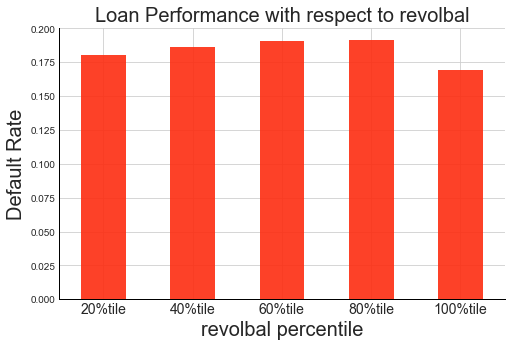

In [41]:
countinuous_variable_plot('revolbal')

revolbal: Total credit revolving balance.

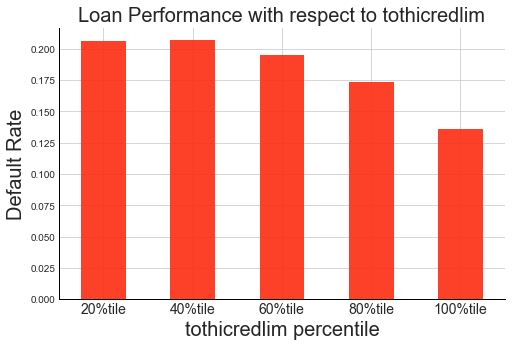

In [42]:
countinuous_variable_plot('tothicredlim')

tothicredlim: Total high credit/credit limit.

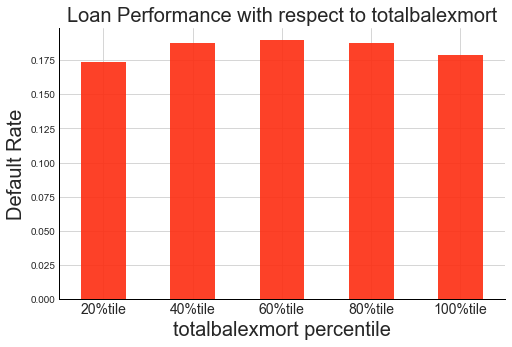

In [43]:
countinuous_variable_plot('totalbalexmort')

totalbalexmort: Total credit balance excluding mortgage.

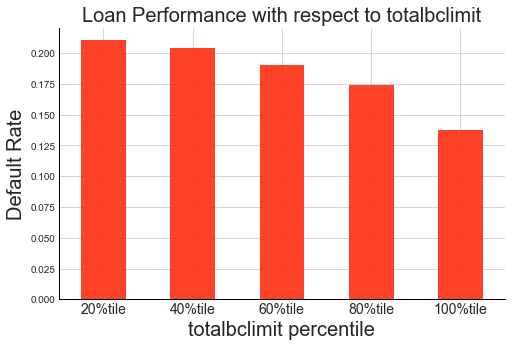

In [44]:
countinuous_variable_plot('totalbclimit')

totalbclimit: Total bankcard high credit/credit limit.

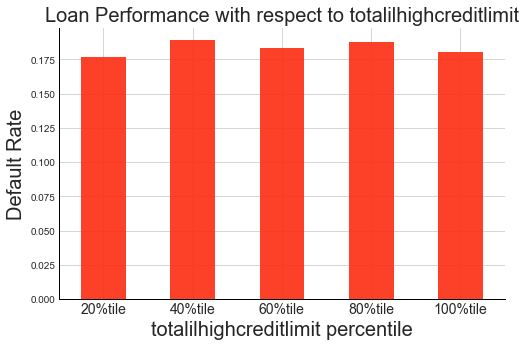

In [45]:
countinuous_variable_plot('totalilhighcreditlimit')

totalilhighcreditlimit: Total installment high credit/credit limit

### (3) Numerical feature correlation and distributions

In [46]:
df_num_corr = df[num_feature].corr()

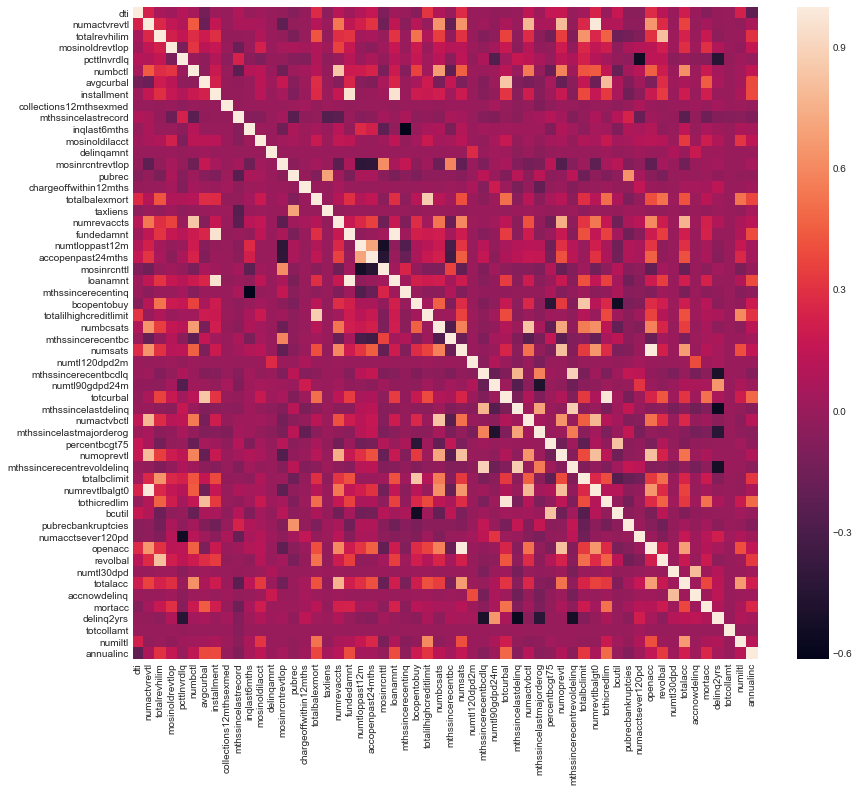

In [47]:
plt.figure(figsize = (14,12))
sns.heatmap(data=df_num_corr)
plt.show()

In [48]:
df_num = df[num_feature]
df_num_rm = df_num[~np.isnan(df_num)]

/Users/jiawei/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jiawei/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


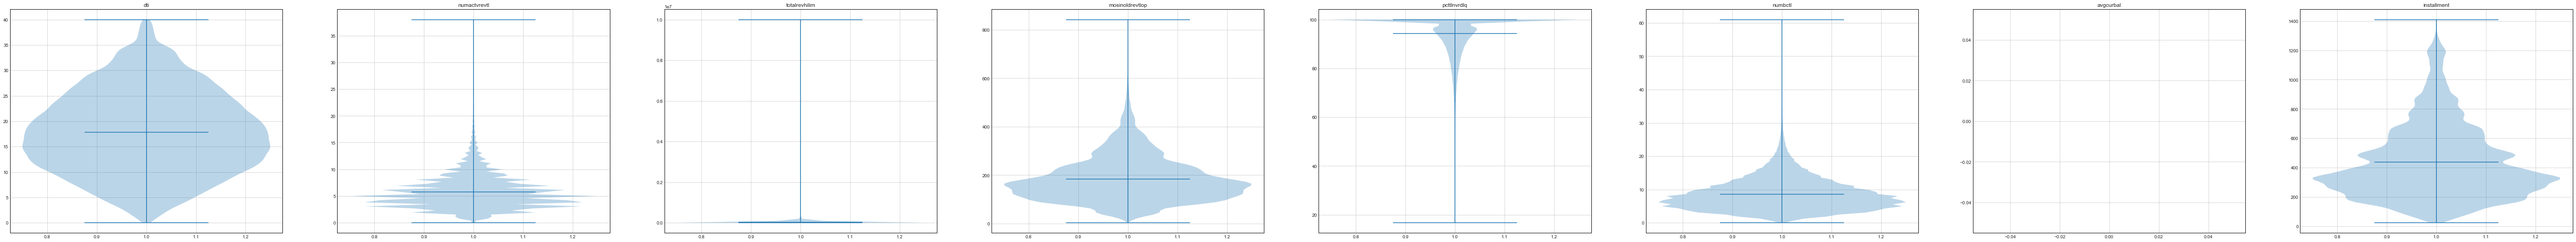

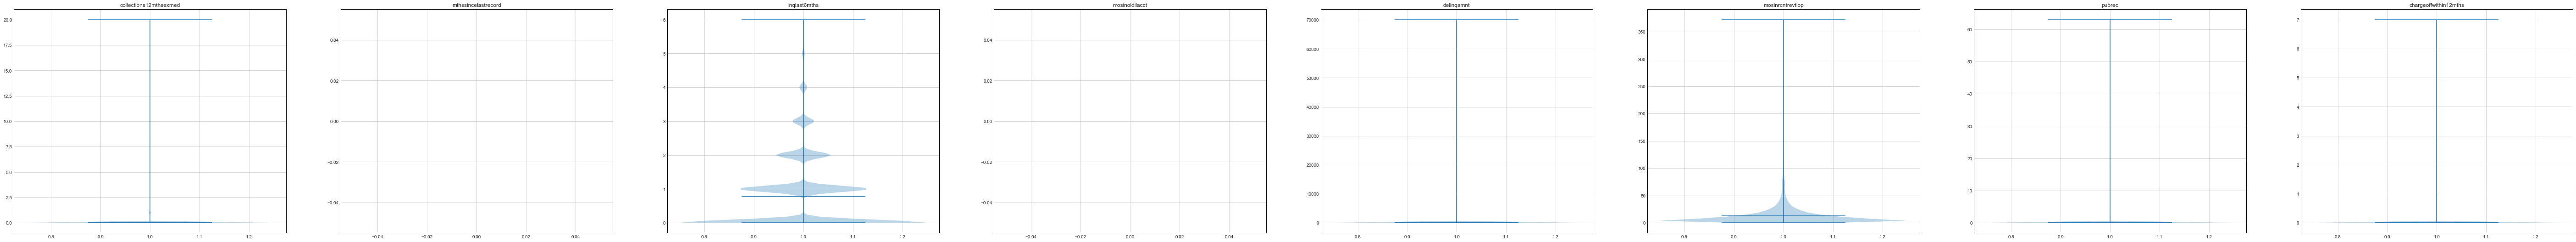

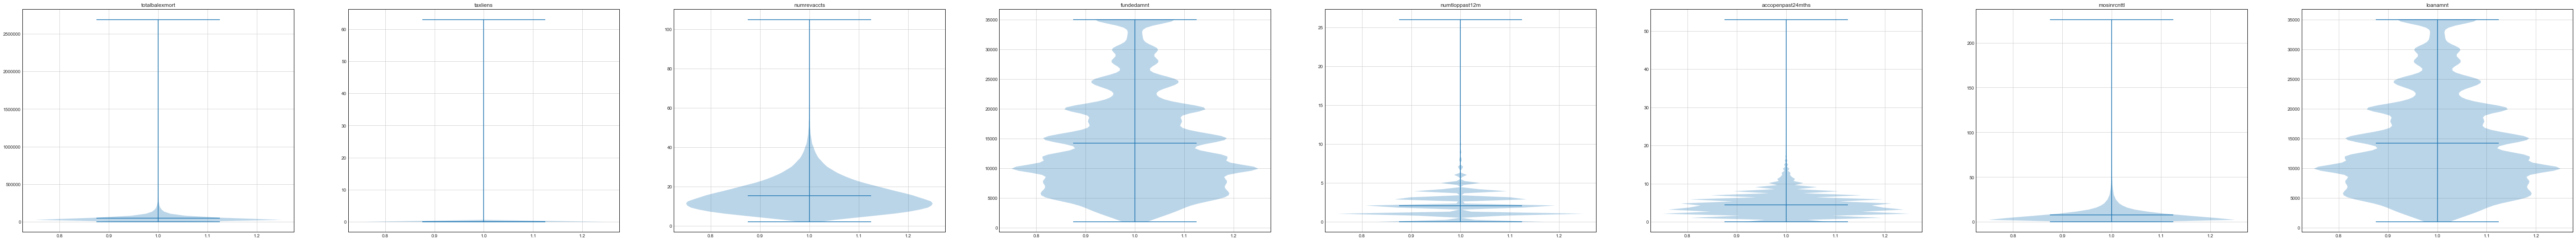

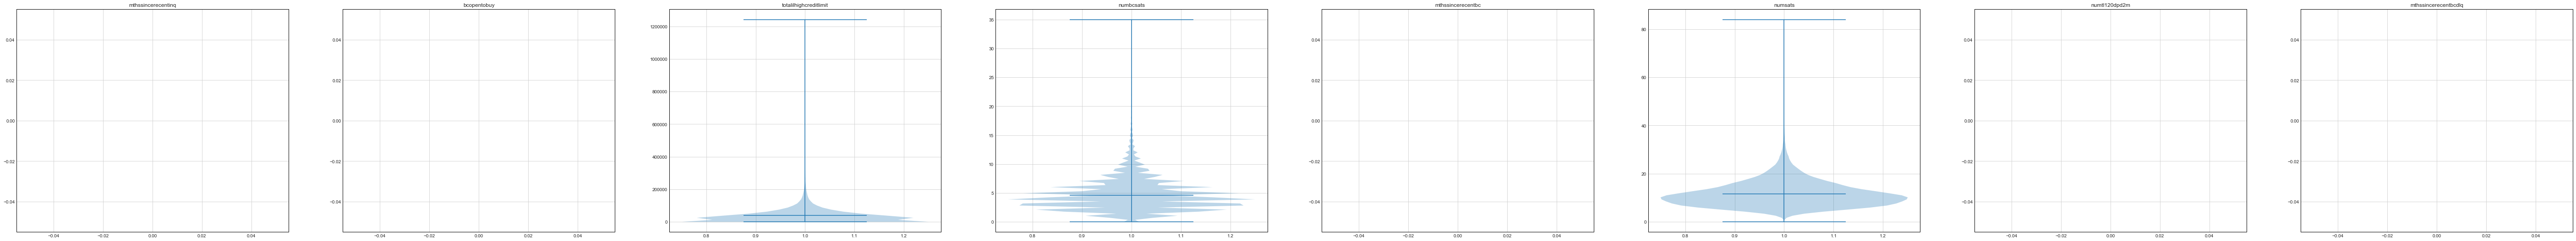

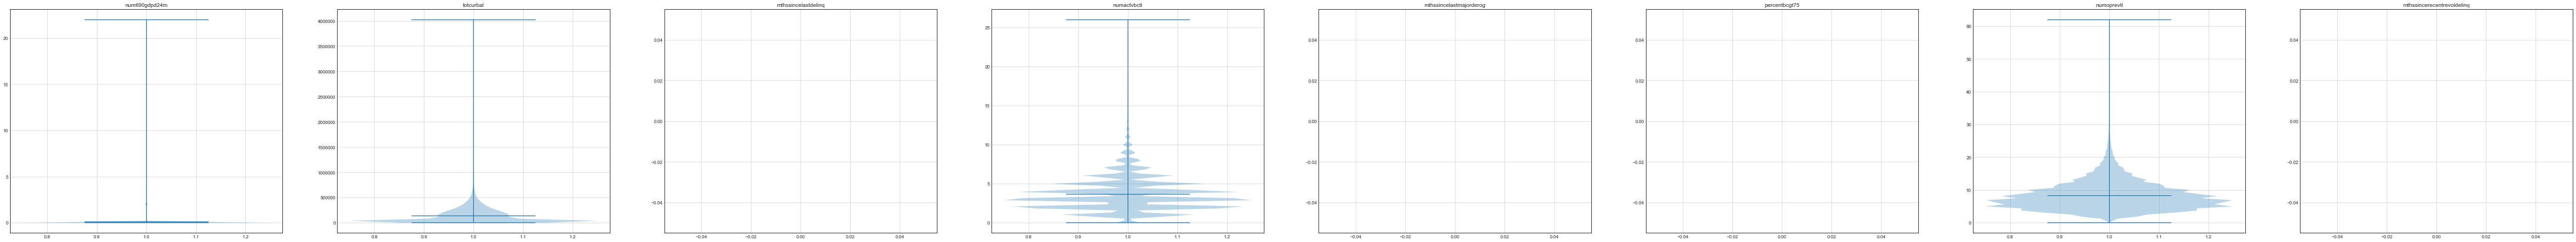

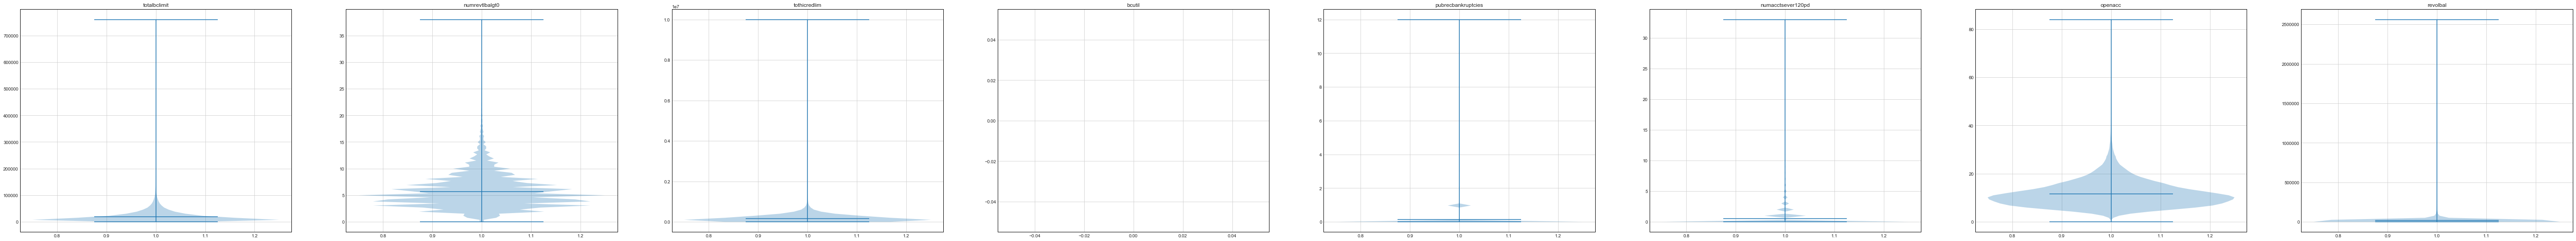

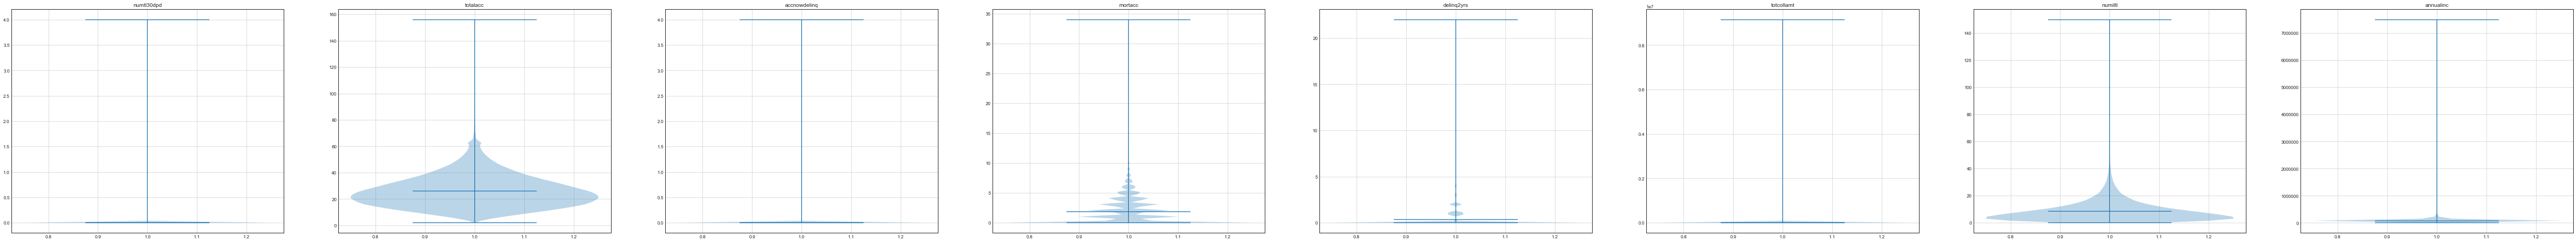

In [50]:
count = 1
for i in range(0,len(num_feature),8):
    fig = plt.figure(figsize=(100,600))    
    for j in range(8):
        plt.subplot(len(num_feature),8,count+j)
        plt.violinplot(df_num_rm[num_feature[i+j]],showmeans=True)
        plt.title(num_feature[i+j])
    count +=8